<font size='9'>  genetic algorithm 

In [112]:
## Choose the best 10 arrays out of 100
import random
from collections import Counter

noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
x = x.flatten()
y = y.flatten()
## calculate least ten badness arrays
ch=np.random.rand(100,4)
bad={}
for gene in ch:
    badness=np.sum(np.square(y-gene[0]*x**3-gene[1]*x**2-gene[2]*x-gene[3])).mean()
    bad[str(gene)]=badness
k = Counter(bad) 
low = k.most_common()[:-10-1:-1]
## put them in an list
best10_ch=[]
for i in range (len(low)):
    ss=low[i][0]
    best10_ch.append(ss)
## covert them into np.ndarray
for best in best10_ch:
    print(best)


[0.01869592 0.66003356 0.46002931 0.95815434]
[0.04055448 0.94005294 0.44970272 0.77728853]
[0.00127671 0.40685883 0.75871799 0.69259511]
[0.01036606 0.12681783 0.63214171 0.15658669]
[0.07549155 0.8729699  0.57370921 0.56606343]
[0.02772175 0.09552069 0.5172446  0.25151825]
[0.08062802 0.82144385 0.59342717 0.67223827]
[0.04586026 0.28071535 0.43027887 0.70465099]
[0.05932379 0.26905814 0.11273363 0.85927523]
[0.10681064 0.99873325 0.45360119 0.4252072 ]


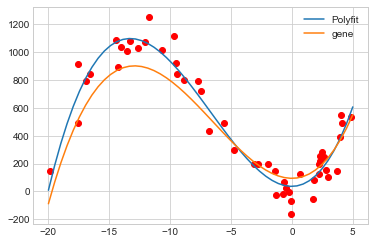

In [149]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
x = x.flatten()
y = y.flatten()

arrays = np.random.rand(100, 4)
badness = [None]*100 
for i in range(500):
  for j in range(len(trend)):
    badness[j] = (np.square(y - np.polyval(arrays[j],x))).mean(axis=0)
  best = np.argsort(badness)[:10]
  newArrays = arrays.copy()
  for j in range(10):
    for k in range(10):
      newArrays[j*10+k] = arrays[best[j]]
      newArrays[j*10+k][np.random.randint(4)] = newArrays[j*10+k][np.random.randint(4)]*np.random.rand()*3
  arrays = newArrays

plt.figure(0)
plt.plot(x,y,'ro')
t = np.linspace(-20,5)
plt.plot(t, np.polyval(np.polyfit(x,y,3), t), label='Polyfit')
plt.plot(t, np.polyval(arrays[np.argsort(badness)[:1]].flatten(), t), label='gene')
plt.legend()